<a href="https://colab.research.google.com/github/nandasantosa/Machine-Learning-32513-UTS/blob/master/A2_Neural_SantosaFernanda13406537_WilleamFelicia13464906_A2_32513.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Link to Google Drive File

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1wgGUzBD8wA1LNMCg4gwhrTvnIH8yGTBQ' # The shareable link

In [0]:
fluff, id = link.split('=')
print (id)

1wgGUzBD8wA1LNMCg4gwhrTvnIH8yGTBQ


In [0]:
import time
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import io

In [0]:
#data nameis df
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('weatherAUS.csv')  
df = pd.read_csv('weatherAUS.csv')
print(df)

              Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0       2008-12-01   Albury     13.4  ...         No      0.0            No
1       2008-12-02   Albury      7.4  ...         No      0.0            No
2       2008-12-03   Albury     12.9  ...         No      0.0            No
3       2008-12-04   Albury      9.2  ...         No      1.0            No
4       2008-12-05   Albury     17.5  ...         No      0.2            No
5       2008-12-06   Albury     14.6  ...         No      0.0            No
6       2008-12-07   Albury     14.3  ...         No      0.0            No
7       2008-12-08   Albury      7.7  ...         No      0.0            No
8       2008-12-09   Albury      9.7  ...         No      1.4           Yes
9       2008-12-10   Albury     13.1  ...        Yes      0.0            No
10      2008-12-11   Albury     13.4  ...         No      2.2           Yes
11      2008-12-12   Albury     15.9  ...        Yes     15.6           Yes
12      2008

# Data Exploration

In [0]:
#checking the labels
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [0]:
labels_map = {}
inv_labels_map = {}
count = 0
for label in df['Location']:
  if(label in labels_map):
    continue
  labels_map[label] = count
  inv_labels_map[count] = label
  count = count + 1
  
  print("Label Map: ", labels_map)
  print("No. of Labels are: ", count)

Label Map:  {'Albury': 0}
No. of Labels are:  1
Label Map:  {'Albury': 0, 'BadgerysCreek': 1}
No. of Labels are:  2
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2}
No. of Labels are:  3
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3}
No. of Labels are:  4
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4}
No. of Labels are:  5
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5}
No. of Labels are:  6
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6}
No. of Labels are:  7
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7}
No. of Labels are:  8
Label Map:  {'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8}
No. of

In [0]:
print(df)

              Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0       2008-12-01   Albury     13.4  ...         No      0.0            No
1       2008-12-02   Albury      7.4  ...         No      0.0            No
2       2008-12-03   Albury     12.9  ...         No      0.0            No
3       2008-12-04   Albury      9.2  ...         No      1.0            No
4       2008-12-05   Albury     17.5  ...         No      0.2            No
5       2008-12-06   Albury     14.6  ...         No      0.0            No
6       2008-12-07   Albury     14.3  ...         No      0.0            No
7       2008-12-08   Albury      7.7  ...         No      0.0            No
8       2008-12-09   Albury      9.7  ...         No      1.4           Yes
9       2008-12-10   Albury     13.1  ...        Yes      0.0            No
10      2008-12-11   Albury     13.4  ...         No      2.2           Yes
11      2008-12-12   Albury     15.9  ...        Yes     15.6           Yes
12      2008

In [0]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [0]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [0]:
#Drop NAN in all attributes
df = df.dropna()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


In [0]:
#Double check that we have removed the NaN
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
120692,2016-11-30,Perth,15.1,26.6,0.0,8.0,13.1,SSW,43.0,SSE,SSW,7.0,22.0,52.0,52.0,1014.5,1012.9,1.0,3.0,22.6,22.7,No,0.0,No
21680,2011-12-30,NorfolkIsland,19.5,23.4,2.6,5.0,5.0,NW,44.0,W,WNW,20.0,26.0,88.0,74.0,1004.5,1004.5,7.0,3.0,21.0,22.9,Yes,0.2,No
21985,2012-10-30,NorfolkIsland,14.2,19.3,1.4,6.6,6.6,SSE,39.0,SSE,SSE,22.0,24.0,75.0,66.0,1016.7,1015.8,7.0,7.0,17.1,17.4,Yes,0.0,No
60280,2010-06-29,Sale,0.2,13.5,0.0,3.2,5.2,NW,46.0,NE,NW,9.0,28.0,60.0,43.0,1015.3,1014.3,3.0,5.0,6.8,11.9,No,0.4,No
69455,2012-07-29,Mildura,3.5,13.7,0.0,1.2,3.6,SW,48.0,SSW,S,11.0,15.0,94.0,50.0,1030.5,1029.4,2.0,7.0,6.6,13.0,No,0.0,No


In [0]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [0]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [0]:
#Changing Date attributes to be read as a date
df["Date"] = pd.to_datetime(df["Date"])

In [0]:
print("Maximum date :: ", df["Date"].max() )
print("Minimum date :: ", df["Date"].min())
print("Count lines :: ", df["Date"].count())

Maximum date ::  2017-06-25 00:00:00
Minimum date ::  2007-11-01 00:00:00
Count lines ::  56420


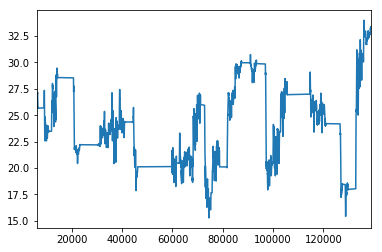

In [0]:
#  Plot of maximum temperature
df['MaxTemp'].rolling(365).mean().plot()

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,
2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,3.6,Yes
2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,3.6,Yes
2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,39.8,Yes
2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.8,Yes
2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0.0,No


# Data Preprocessing

In [0]:
# Create data on specific location that we want to analyse which is Sydney.
_SydneyData = df[df["Location"] == "Sydney"]
_SydneyData

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,
2010-10-20,Sydney,12.9,20.3,0.2,3.0,10.9,ENE,37.0,W,E,11.0,26.0,70.0,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,No,0.0,No
2010-10-21,Sydney,13.3,21.5,0.0,6.6,11.0,ENE,41.0,W,ENE,11.0,28.0,75.0,58.0,1025.9,1022.4,2.0,5.0,17.6,21.3,No,0.0,No
2010-10-22,Sydney,15.3,23.0,0.0,5.6,11.0,NNE,41.0,W,ENE,6.0,19.0,70.0,63.0,1021.4,1017.8,1.0,4.0,19.0,22.2,No,0.0,No
2010-10-26,Sydney,12.9,26.7,0.2,3.8,12.1,NE,33.0,W,ENE,13.0,24.0,73.0,56.0,1018.0,1015.0,1.0,5.0,17.8,22.5,No,0.0,No
2010-10-27,Sydney,14.8,23.8,0.0,6.8,9.6,SSE,54.0,SSE,SE,13.0,26.0,76.0,69.0,1016.0,1014.7,2.0,7.0,20.2,20.6,No,1.8,Yes
2010-10-29,Sydney,14.5,22.1,0.2,6.2,1.8,ENE,31.0,WNW,ENE,11.0,15.0,82.0,59.0,1020.7,1017.5,7.0,7.0,16.2,20.5,No,0.0,No
2010-11-01,Sydney,18.1,20.4,5.2,6.6,0.1,SSE,48.0,S,SSE,22.0,28.0,78.0,77.0,1014.7,1012.1,8.0,8.0,18.7,18.6,Yes,32.6,Yes
2010-11-03,Sydney,12.0,23.9,0.2,4.0,11.9,SE,44.0,W,ESE,13.0,24.0,65.0,54.0,1018.1,1016.3,1.0,3.0,17.6,20.7,No,0.4,No
2010-11-04,Sydney,14.4,18.1,0.4,5.4,2.8,ESE,48.0,S,SE,15.0,20.0,83.0,68.0,1022.3,1020.5,7.0,7.0,14.8,17.6,No,8.4,Yes


In [0]:
meanValuesObj = _SydneyData.mean()
print('Mean value in each row : ')
print(meanValuesObj)

Mean value in each row : 
MinTemp            15.031893
MaxTemp            23.450178
Rainfall            2.832308
Evaporation         5.388462
Sunshine            7.399112
WindGustSpeed      41.575740
WindSpeed9am       15.084024
WindSpeed3pm       19.597041
Humidity9am        66.366864
Humidity3pm        53.024260
Pressure9am      1018.533254
Pressure3pm      1016.130237
Cloud9am            4.204142
Cloud3pm            4.150296
Temp9am            18.113728
Temp3pm            21.900355
RISK_MM             3.104024
dtype: float64


In [0]:
# how many data points do we have in Sydney data
_SydneyData.count().sort_values()

Location         1690
RainToday        1690
Temp3pm          1690
Temp9am          1690
Cloud3pm         1690
Cloud9am         1690
Pressure3pm      1690
Pressure9am      1690
Humidity3pm      1690
Humidity9am      1690
RISK_MM          1690
WindSpeed3pm     1690
WindDir3pm       1690
WindDir9am       1690
WindGustSpeed    1690
WindGustDir      1690
Sunshine         1690
Evaporation      1690
Rainfall         1690
MaxTemp          1690
MinTemp          1690
WindSpeed9am     1690
RainTomorrow     1690
dtype: int64

In [0]:
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
_SydneyData = _SydneyData.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM'],axis=1)
_SydneyData.shape

(1690, 17)

In [0]:
#Delete any Na in Sydney data
_SydneyData = _SydneyData.dropna(how='any')
_SydneyData.shape

(1690, 17)

Data Preprocessing

In [0]:
#remove the outliers in our data - using Z-score to detect and remove the outliers.
from scipy import stats
z = np.abs(stats.zscore(_SydneyData._get_numeric_data()))
print(z)
_SydneyData= _SydneyData[(z < 3).all(axis=1)]
print(_SydneyData.shape)

[[0.47135192 0.70379268 0.32002218 ... 1.34106279 0.24751534 0.49300913]
 [0.38291374 0.43569629 0.34433714 ... 0.88789402 0.10476444 0.14091928]
 [0.05927713 0.10057581 0.34433714 ... 0.23646393 0.18073736 0.07033464]
 ...
 [1.24518594 1.28466819 0.34433714 ... 0.16005874 1.61384538 1.07982556]
 [1.09041914 0.92720634 0.34433714 ... 0.14589721 1.1651997  0.68079039]
 [1.64315772 0.92720634 0.34433714 ... 0.10341264 1.77698927 0.7277357 ]]
(1596, 17)


In [0]:
#categorical cloumns changing Yes/No to binary 
# simply change yes/no to 1/0 for RainToday and RainTomorrow
_SydneyData['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
_SydneyData['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# See unique values and convert them to int using pd.getDummies()
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))
# transform the categorical columns
_SydneyData = pd.get_dummies(_SydneyData, columns=categorical_columns)
_SydneyData.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-27,14.8,23.8,0.0,54.0,13.0,26.0,76.0,69.0,1016.0,1014.7,20.2,20.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2010-10-29,14.5,22.1,0.2,31.0,11.0,15.0,82.0,59.0,1020.7,1017.5,16.2,20.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2010-11-01,18.1,20.4,5.2,48.0,22.0,28.0,78.0,77.0,1014.7,1012.1,18.7,18.6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2010-11-03,12.0,23.9,0.2,44.0,13.0,24.0,65.0,54.0,1018.1,1016.3,17.6,20.7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2010-11-04,14.4,18.1,0.4,48.0,15.0,20.0,83.0,68.0,1022.3,1020.5,14.8,17.6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
#standardize our data - using MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(_SydneyData)
_SydneyData = pd.DataFrame(scaler.transform(_SydneyData), index=_SydneyData.index, columns=_SydneyData.columns)
_SydneyData.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-10-27,0.462264,0.485944,0.000000,0.627119,0.333333,0.615385,0.696203,0.694118,0.434889,0.475369,0.555556,0.408511,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2010-10-29,0.448113,0.417671,0.007299,0.237288,0.272727,0.333333,0.772152,0.576471,0.550369,0.544335,0.390947,0.404255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010-11-01,0.617925,0.349398,0.189781,0.525424,0.606061,0.666667,0.721519,0.788235,0.402948,0.411330,0.493827,0.323404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-11-03,0.330189,0.489960,0.007299,0.457627,0.333333,0.564103,0.556962,0.517647,0.486486,0.514778,0.448560,0.412766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2010-11-04,0.443396,0.257028,0.014599,0.525424,0.393939,0.461538,0.784810,0.682353,0.589681,0.618227,0.333333,0.280851,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-11-05,0.396226,0.301205,0.306569,0.491525,0.454545,0.717949,0.582278,0.505882,0.628993,0.657635,0.349794,0.289362,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Top 5 feature selection in Sydney Data
from sklearn.feature_selection import SelectKBest, chi2
_x = _SydneyData.loc[:, _SydneyData.columns != "RainTomorrow"]
_y = _SydneyData[["RainTomorrow"]]
_selector = SelectKBest(chi2, k = 5)
_selector.fit(_x, _y)
_x_new = _selector.transform(_x)
print(_x.columns[_selector.get_support(indices = True)])

Index(['Rainfall', 'RainToday', 'WindGustDir_S', 'WindDir3pm_S',
       'WindDir3pm_SSW'],
      dtype='object')


In [0]:
# _SydneyData = _SydneyData[["Cloud3pm", "RainToday", "WindDir3pm_SSW", "RainTomorrow"]]
# 3 features
# _Data = _SydneyData[["Cloud3pm", "RainToday", "WindDir3pm_SSW"]]
# all features
# _Data = _SydneyData.loc[:, _SydneyData.columns != "RainTomorrow"]
# 5 features
# _Data = _SydneyData[["Rainfall", "Sunshine", "Cloud3pm", "RainToday", "WindDir3pm_SSW"]]

_Data = _x_new
_Label = df ["RainTomorrow"]

_Data.shape

(1596, 5)

# Decision Tree Model

In [0]:
# the important features as assign them as X
df = df[['Rainfall','RainToday','RainTomorrow']]
X = df[['Rainfall']] # let's use only one feature Rainfall
y = df[['RainTomorrow']]

In [0]:
#deicision tree suitable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.tree import DecisionTreeClassifier

t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7864587025877349
Time taken : 0.09249496459960938


# Neural Network Model

In [0]:
#Split the dataset into three sets.
#train - 80% valid - 10% test - 10%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

In [0]:
X_train.shape

(45136, 1)

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Input, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
from keras.layers import Dense, Activation, Input, BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.regularizers import l2

To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.

In [0]:
_TrainData, _TestData, _TrainLabel, _TestLabel = train_test_split(_Data, _Label, test_size = 0.25)

_i = Input(shape = (_Data.shape[1],))
_x = Dense(64, kernel_regularizer = l2(0.005))(_i)
_x = BatchNormalization()(_x)
_x = Activation("relu")(_x)
_x = Dense(64, kernel_regularizer = l2(0.005))(_x)
_x = BatchNormalization()(_x)
_x = Activation("relu")(_x)
_o = Dense(1, activation = "sigmoid")(_x)

_model = Model(_i, _o)
_model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
_callback = EarlyStopping(monitor='val_loss', patience=500, verbose=1, mode='auto')
_model.fit(_TrainData, _TrainLabel, validation_data = (_TestData, _TestLabel), batch_size = 32, epochs = 10000, callbacks = [_callback])
_, _train_acc = _model.evaluate(_TrainData, _TrainLabel, verbose=0)
_, _test_acc = _model.evaluate(_TestData, _TestLabel, verbose=0)
print('Train: %.3f, Test: %.3f' % (_train_acc, _test_acc))

In [0]:
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.7864587025877349
Time taken : 198.0265383720398


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # To get models info.

In [0]:
# Confusion matrix_train_acc, _test_acc
y_train_acc = [2, 0, 2, 2, 0, 1]
y_test_acc = [0, 0, 2, 2, 0, 2]
(y_train_acc, y_test_acc)

([2, 0, 2, 2, 0, 1], [0, 0, 2, 2, 0, 2])